# Naive Bayes Classifier By: Eng/Mohammed Sweileh & Eng/Mohammed Nashwan

## Load Lib

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,recall_score,f1_score,confusion_matrix,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

## Load Dataset

In [2]:
dataset=pd.read_csv('Reviews.csv')

## Know Your Data

In [3]:
dataset.shape

(27538, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27538 entries, 0 to 27537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    27538 non-null  object
 1   label   27538 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 430.4+ KB


In [5]:
dataset.describe()

,label
count,27538.000000
mean,0.500000
std,0.500009
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [6]:
dataset.head()

,Text,label
0,شي جميل ويفر رصيد الهاتف النقال ويسرع الطلب,1
1,أفصل موقع,1
2,حلوه تطبيق,1
3,شىء سىء جدا,0
4,رائع افتحوا فرع بالاردن وبعدين انا بطلب منكم د...,1


In [7]:
dataset.tail()

,Text,label
27533,اباكم تسوولي تخفيص,1
27534,روعه بس يحتاج تحديث لمطاعم كل منطقة,1
27535,لا يعمل التطبيق في الاردن,0
27536,تطبيق اكثر من رائع يستاهل الخمسه,1
27537,انصحكم بتنزيله حبيت البرنامج مررررة,1


## Clean Data

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.isna().sum()

Text     0
label    0
dtype: int64

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
# تنظيف البيانات
dataset.dropna(inplace=True)

In [12]:
dataset.isna().sum()

Text     0
label    0
dtype: int64

In [13]:
dataset.duplicated().sum()

0

In [14]:
dataset=dataset.sample(frac=1,random_state=42).reset_index(drop=True)

## balanced_data

In [15]:
value_counts=dataset['label'].value_counts()
value_counts

label
1    13769
0    13769
Name: count, dtype: int64

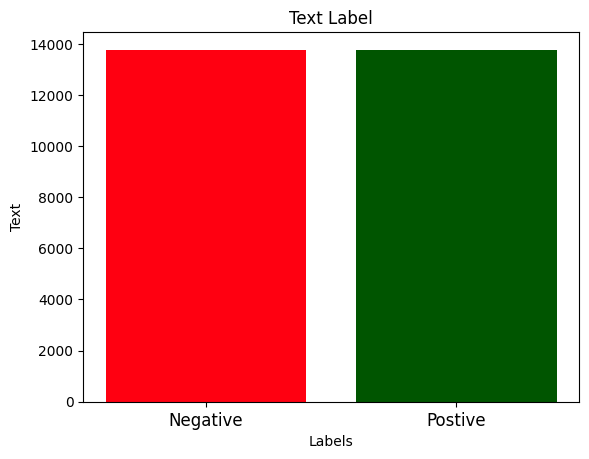

In [16]:
colors = ['#005500','#FF0011']
plt.bar(value_counts.index,value_counts.values,color=colors)
plt.title('Text Label')
plt.xlabel('Labels')
plt.xticks(ticks=[0, 1],labels=['Negative', 'Postive'],fontsize=12)
plt.ylabel('Text')
plt.show()

## Feature Extraction

In [17]:
# تحويل النصوص إلى تمثيل عددي باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataset['Text'])
y = dataset['label']

## Split DataSet Train and Test

In [18]:
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [19]:
# الآن لديك بيانات متوازنة جاهزة للتدريب
print("عدد العينات في مجموعة التدريب:", X_train.shape[0])
print("عدد العينات في مجموعة الاختبار:", X_test.shape[0])
print('*'*20)
print("عدد العينات في مجموعة التدريب:", y_train.shape[0])
print("عدد العينات في مجموعة الاختبار:", y_test.shape[0])

عدد العينات في مجموعة التدريب: 22030
عدد العينات في مجموعة الاختبار: 5508
********************
عدد العينات في مجموعة التدريب: 22030
عدد العينات في مجموعة الاختبار: 5508


## Naive Bayes Train

In [20]:
# تدريب النموذج
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

## Model Evaluation

In [22]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[2343,  446],
       [ 362, 2357]], dtype=int64)

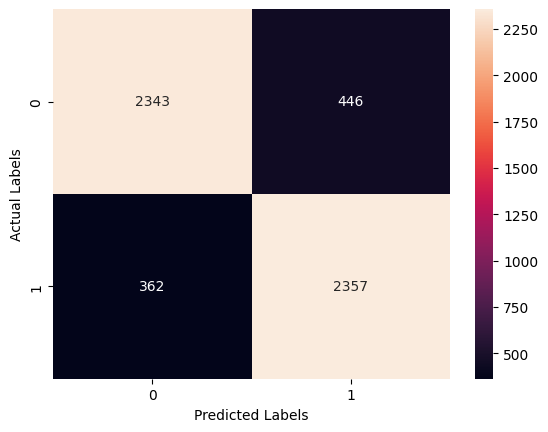

In [23]:
labels = np.array([["TN", "FP"], ["FN", "TP"]])
sns.heatmap(matrix, annot=True, fmt="", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.savefig('Conf_matrix.png')

### Accuracy_Score
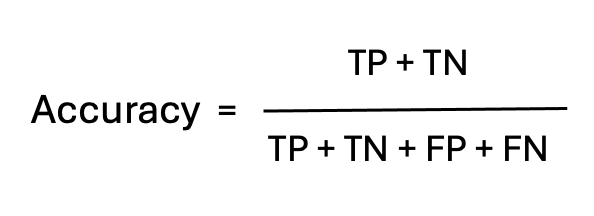

In [24]:
accuracy_score(y_test,y_pred)

0.8533042846768337

### Precision Score:
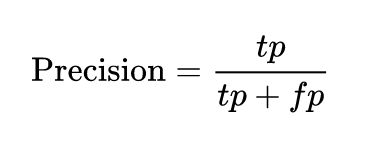

In [25]:
precision_score(y_test,y_pred)

0.8408847663217981

### Recall Score:
![My Image](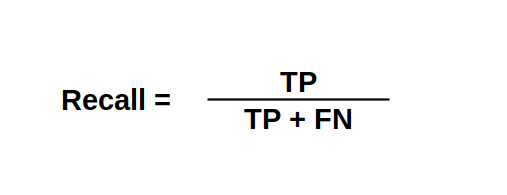
)

In [26]:
recall_score(y_test,y_pred)

0.8668628172122104

In [27]:
f1_score(y_test,y_pred)

0.8536762042738139

### واجهة المستخدم التفاعلية

In [28]:
import gradio as gr

def predict_sentiment(review):
    review_vectorized = vectorizer.transform([review])
    prediction = model.predict(review_vectorized)[0]
    labels_map = {0: "سلبي", 1: "إيجابي"}
    return labels_map.get(prediction, "غير معروف")

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# واجهة المستخدم التفاعلية
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="أدخل رأيك هنا..."),
    outputs="text",
    title="نموذج تصنيف آراء مستخدمين حول تطبيق مـــا",
    description="أدخل مراجعتك وسيقوم النموذج بتحديد ما إذا كانت إيجابية أو سلبية ."
)
interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
